# Mobile Price Prediction

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [4]:
data = pd.read_csv('Cellphone.csv')
data


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [5]:
train=pd.read_csv(r'train.csv')
train
test=pd.read_csv(r'test.csv')
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [6]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
test.drop('id',axis=1,inplace=True)

In [9]:
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


# EDA

In [11]:
train.shape

(2000, 21)

In [12]:
test.shape

(1000, 20)

In [13]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [16]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Visualization

<Axes: ylabel='count'>

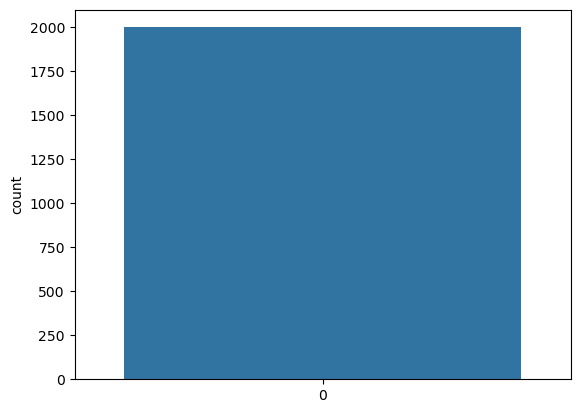

In [59]:
sns.countplot(train['Saleprice'])

In [58]:
#Correlation 1.Positive Correlation 2.Negative Correlation
correlation=data.corr()
correlation

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


<Axes: >

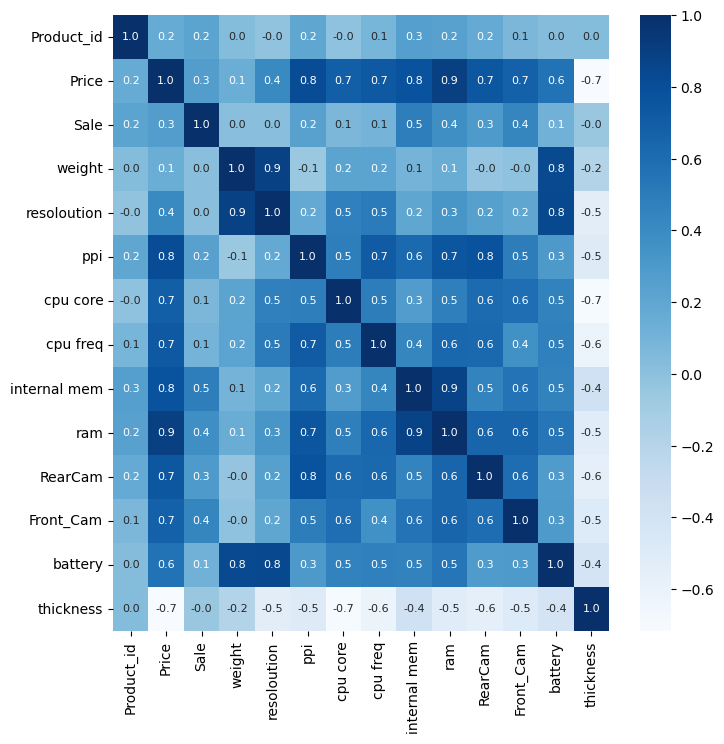

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [19]:
#correlation values of GLD
print(correlation['Price'])

Product_id      0.165136
Price           1.000000
Sale            0.273263
weight          0.144555
resoloution     0.404010
ppi             0.817614
cpu core        0.686811
cpu freq        0.727383
internal mem    0.776738
ram             0.896915
RearCam         0.739538
Front_Cam       0.675286
battery         0.559946
thickness      -0.716773
Name: Price, dtype: float64


C:\Users\Pratiksha\AppData\Local\Temp\ipykernel_20980\4260221335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],color='green')


<Axes: xlabel='Price', ylabel='Density'>

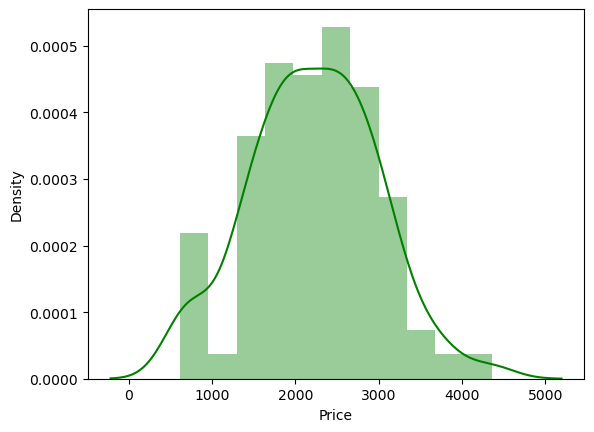

In [20]:
#checking the distribution of the GLD price
sns.distplot(data['Price'],color='green')

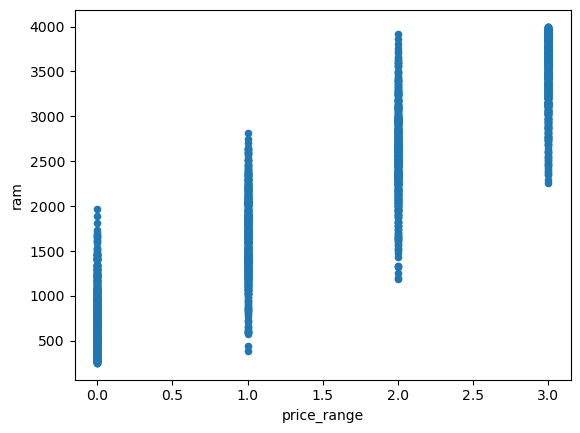

In [21]:
train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

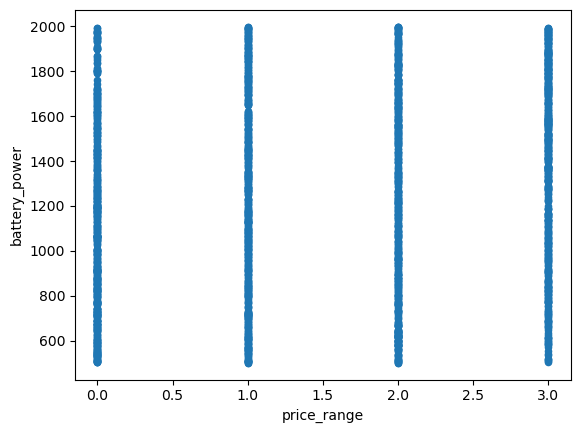

In [22]:
train.plot(x='SalePrice',y='battery_power',kind='scatter')
plt.show()

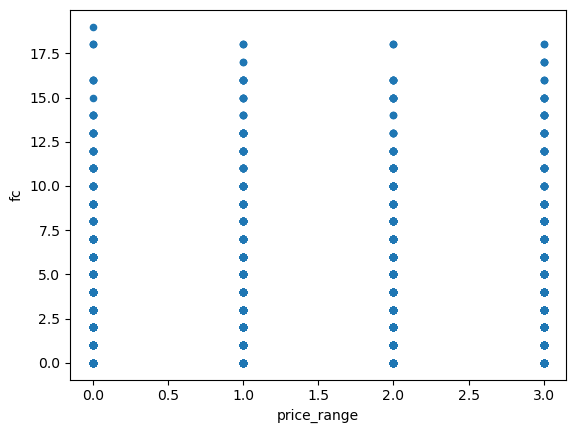

In [23]:
train.plot(x='SalePrice',y='fc',kind='scatter')
plt.show()

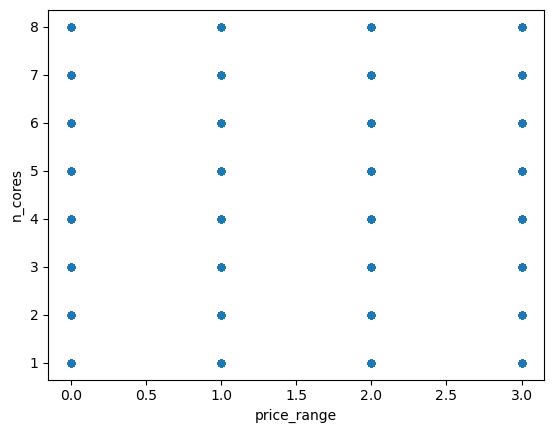

In [24]:
train.plot(x='SalePrice',y='n_cores',kind='scatter')
plt.show()

# Split into features and labels

In [25]:
X = train.drop('SalePrice',axis=1)
y = train['price_range']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train1 = sc.transform(X_train)
X_test1 = sc.transform(X_test)

In [28]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1795,527,0,0.7,1,4,0,53,0.9,128,1,11,67,1924,1302,13,7,13,0,0,0
416,912,1,2.0,0,1,0,54,0.3,161,8,5,329,1053,2330,19,5,20,0,1,0
1697,1152,1,2.1,1,0,1,26,0.3,82,2,0,1304,1673,3284,15,2,8,1,0,1
1298,1089,0,1.4,1,10,0,2,0.1,153,7,20,211,1409,2620,7,5,13,1,0,0
288,1191,0,1.3,1,16,1,26,0.8,84,1,20,681,683,1604,14,3,9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1166,1,0.5,0,7,0,59,0.5,80,1,11,437,638,3887,8,6,7,1,0,1
1862,1043,0,2.7,0,3,0,29,0.2,83,8,17,887,893,1183,5,3,8,1,0,0
1361,1549,1,1.5,1,0,1,27,0.4,113,5,7,632,1162,436,10,8,11,1,0,0
1547,1611,0,0.5,1,4,1,27,0.9,199,1,10,163,1011,3078,15,2,6,1,0,1


In [29]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1458,1368,0,0.5,0,10,1,42,0.2,91,1,20,907,925,1590,12,0,14,1,0,0
198,609,0,0.5,0,3,0,26,0.3,93,4,4,938,1948,1866,11,10,14,1,1,1
1276,586,0,1.4,1,10,1,8,0.5,142,8,14,116,598,3178,9,7,10,1,0,1
1243,1180,1,1.2,0,5,1,50,1.0,144,4,20,925,1252,1464,7,3,20,1,1,1
1267,896,0,1.0,1,3,1,4,0.3,111,1,4,1379,1469,1060,12,10,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,1760,0,1.9,0,1,1,50,0.8,198,1,2,273,1704,2549,10,8,4,1,1,0
756,545,0,0.5,0,0,1,11,0.3,131,3,1,381,1452,616,15,6,19,1,1,1
1166,999,1,1.8,1,0,1,27,0.1,167,4,1,20,745,1344,17,10,5,1,0,0
1734,1285,0,0.8,1,4,1,11,0.8,199,5,7,1791,1896,3966,17,15,2,1,1,1


In [60]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1458,1368,0,0.5,0,10,1,42,0.2,91,1,20,907,925,1590,12,0,14,1,0,0
198,609,0,0.5,0,3,0,26,0.3,93,4,4,938,1948,1866,11,10,14,1,1,1
1276,586,0,1.4,1,10,1,8,0.5,142,8,14,116,598,3178,9,7,10,1,0,1
1243,1180,1,1.2,0,5,1,50,1.0,144,4,20,925,1252,1464,7,3,20,1,1,1
1267,896,0,1.0,1,3,1,4,0.3,111,1,4,1379,1469,1060,12,10,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,1760,0,1.9,0,1,1,50,0.8,198,1,2,273,1704,2549,10,8,4,1,1,0
756,545,0,0.5,0,0,1,11,0.3,131,3,1,381,1452,616,15,6,19,1,1,1
1166,999,1,1.8,1,0,1,27,0.1,167,4,1,20,745,1344,17,10,5,1,0,0
1734,1285,0,0.8,1,4,1,11,0.8,199,5,7,1791,1896,3966,17,15,2,1,1,1


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train , Y_train)

DecisionTreeClassifier()

In [32]:
pred = dtc.predict(X_test)
pred

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 3, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 2, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 1, 0, 0, 1, 3, 3, 0, 2, 1, 3, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       1, 2, 3, 1, 2, 1, 0, 0, 3, 2, 1, 2, 1, 3, 1, 0, 2, 2, 0, 3, 0, 0,
       3, 0], dtype=int64)

In [33]:
Y_test

1458    1
198     1
1276    2
1243    1
1267    1
       ..
773     2
756     0
1166    0
1734    3
138     0
Name: price_range, Length: 200, dtype: int64

# Confusion Matrix

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
dtc_acc = accuracy_score(Y_test,pred)
print(dtc_acc)
print(confusion_matrix(pred,Y_test))

0.85
[[43  4  0  0]
 [ 7 39  7  0]
 [ 0  3 48  2]
 [ 0  0  7 40]]


# SVM Classification

In [35]:
from sklearn.svm import SVC
knn=SVC()
knn.fit(X_train,Y_train)

SVC()

In [36]:
pred1 = knn.predict(X_test)
pred1

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 3, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(pred1,Y_test)
print(svc_acc)
print(confusion_matrix(pred1,Y_test))

0.95
[[49  3  0  0]
 [ 1 43  2  0]
 [ 0  0 58  2]
 [ 0  0  2 40]]


In [38]:
knn.score(X_test,Y_test)

0.95

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression  # its a classification
lr=LogisticRegression()
lr.fit(X_train,Y_train)

C:\Users\Pratiksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
lr.score(X_test,Y_test)

0.575

In [41]:
pred2 = lr.predict(X_test)
pred2

array([2, 2, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1,
       2, 2, 3, 2, 2, 1, 0, 0, 2, 2, 0, 0, 3, 0, 1, 0, 0, 1, 0, 3, 3, 3,
       3, 1, 1, 2, 3, 1, 0, 2, 3, 2, 3, 3, 1, 3, 2, 2, 2, 3, 3, 1, 3, 0,
       0, 1, 0, 2, 2, 1, 3, 2, 3, 3, 3, 1, 0, 1, 0, 0, 2, 1, 2, 3, 1, 2,
       0, 0, 3, 3, 0, 1, 0, 3, 2, 0, 1, 3, 1, 1, 3, 3, 0, 3, 0, 0, 3, 0,
       1, 0, 2, 1, 2, 2, 2, 3, 1, 0, 3, 2, 3, 3, 2, 2, 3, 3, 1, 1, 0, 0,
       1, 1, 0, 1, 3, 0, 3, 2, 3, 3, 0, 1, 0, 1, 1, 3, 3, 0, 2, 1, 2, 1,
       3, 1, 2, 1, 3, 1, 1, 1, 2, 2, 0, 2, 1, 0, 3, 3, 1, 3, 1, 3, 2, 2,
       2, 3, 3, 3, 1, 1, 1, 0, 3, 2, 1, 2, 0, 2, 1, 0, 3, 3, 0, 1, 0, 0,
       3, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(pred2,Y_test)
print(lr_acc)
print(confusion_matrix(pred2,Y_test))

0.575
[[37 11  0  0]
 [12 26 19  0]
 [ 1  8 21 11]
 [ 0  1 22 31]]


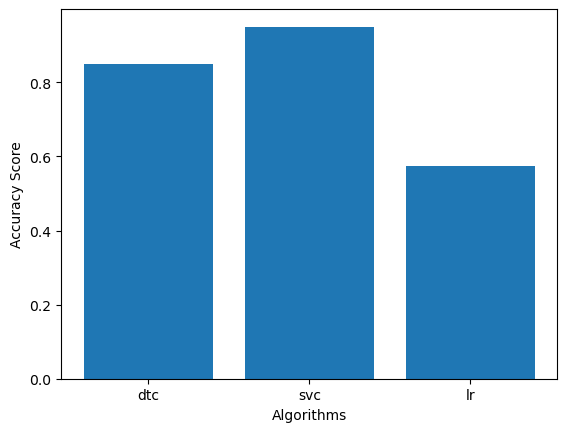

In [43]:
plt.bar(x=['dtc','svc','lr'],height=[dtc_acc,svc_acc,lr_acc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

# Predicted value

In [55]:
knn.predict(X_test)

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 3, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0], dtype=int64)

# Actual Value

In [56]:
Y_test.head(20)

1458    1
198     1
1276    2
1243    1
1267    1
201     1
903     2
295     1
1333    1
236     1
1842    0
1356    1
218     1
1406    1
1391    1
1412    0
1307    0
1499    2
423     0
1435    1
Name: price_range, dtype: int64

In [57]:
knn.score(X_test,Y_test)

0.95